# Data Driven Modeling
### (Theme of this semester: CODING AS LITERACY)
<hr style="height:3px;border:none;color:stillblue;background-color:black;" />
### PhD seminar series at Chair for Computer Aided Architectural Design (CAAD), ETH Zurich


###### <a href=https://vahidmoosavi.com/> Vahid Moosavi </a>
<hr style="height:1px;border:none;color:stillblue;background-color:black;" />

<a></a>

# 12th Session 
<hr style="height:1px;border:none;color:stillblue;background-color:steelblue;" />
<span style="color:steelblue;font-size: 1em;"> 07 March 2017</span>


# Ensemble Models

### Topics to be discussed 
* **Idea**
    * **Meta-Level set ups for ML algorithms**
* **Two main types**
    * **Bootstrap aggregating, also called bagging  (Independent learners)**
    * **Boosting (Sequentially improving learners)** 
* ** Ensemble of weak learners** 
* **trade-off of more computation time**
* **Both Supervised and Unsupervised**
* **Intro to Scikit Learn**

<hr style="height:1px;border:none;color:stillblue;background-color:steelblue;" />


# Ensembles are in general about randomization and how by randomization we get better results!

### A very nice reference to this line of discussions: "Statistical Modeling: The Two Cultures" Leo Breiman, https://projecteuclid.org/euclid.ss/1009213726


<hr style="height:3px;border:none;color:stillblue;background-color:steelblue;" />


# 1- Bagging of  independent learners
<hr style="height:1px;border:none;color:stillblue;background-color:steelblue;" />

## Two main randomization strategies:
* **Random Samples Without/With Replacement (Bootstraping: With replacement)**
* **Random subsets of data points/features**
* **This goes to "Resampling" theories https://en.wikipedia.org/wiki/Bootstrapping_(statistics)**

## Bagging: Bootstrap aggregating


# Main known ML models
* **Classical tree bagging (Data Bootstraping)**
* **Random Forests (Data and Feature Bootstraping)**
* **ExtraTrees (Data and Feature Bootstraping + random tree construction)**


<hr style="height:5px;border:none;color:stillblue;background-color:red;" />
# Before starting the codes: 
## Scikit-Learn is a very complete Python Library for classical ML algorithms!

## there are lots of tutorials a bout it. The website of the library is also full of nice tutorials and exmaples. http://scikit-learn.org/stable/index.html

## If we learn the main underlying concepts about an algorithm, we can easily find some implementations of it in Scikit-Learn! 
## Just play with it!!! 
<hr style="height:5px;border:none;color:stillblue;background-color:red;" />

# EXAMPL: Bagging of random polynomial regression models

In [255]:
x1 = np.random.rand(N) * 10 - 5
x1 = np.sort(x1)
x1 = x1[:,np.newaxis]
noise = 0.1 
def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

y = f(x1) + np.random.normal(0.0, noise, N)
y = y[:,np.newaxis]

def polynomial_regr(degree=1,n_estimators=10):
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn import linear_model
    import random
    dlen = x1.shape[0]

    Y_ = np.zeros(y.shape)
    
    for i in range(n_estimators):
        
        
        X_tr = x1[:].astype(float)
        y_tr = y[:].astype(float)
        
        #degree = np.random.randint(2,10)
        poly = PolynomialFeatures(degree=degree)
        X_tr_ = poly.fit_transform(X_tr)
        
        ind = random.sample(range(dlen),int(dlen/4))
        
#         
        
        regr = linear_model.LinearRegression()
        regr.fit(X_tr_[ind], y_tr[ind])
        y_pred_tr = regr.predict(X_tr_)
        
        
        
    
        Y_ = np.add(Y_ , y_pred_tr)
        plt.plot(X_tr,y_pred_tr,'-b',markersize=.02,alpha=.1 );
    Y_ = Y_/float(n_estimators)
    print Y_.shape, y_pred_tr.shape
    plt.plot(X_tr,Y_,'-g',markersize=9,alpha=1 );
    plt.plot(X_tr,y_tr,'.r',markersize=2,alpha=1 );
    plt.xlim(x1.min(),x1.max())
    plt.ylim(y.min(),y.max())

(200, 1) (200, 1)


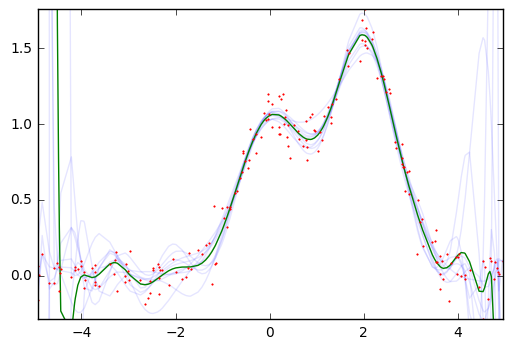

In [257]:
from ipywidgets import interact, HTML, FloatSlider
interact(polynomial_regr,degree=(1,20,1),n_estimators=(1,150,1));

## But for polynomials, Bagging doesn't help that much, as each of them try to have a global view.
<hr style="height:2px;border:none;color:stillblue;background-color:steelblue;" />



# What if we perform Bagging on weak learners that overfit?

# It might look contradictory?


# Tree Bagging
* **Bagging of "Weak Learners" such as Randomized Decision Trees**

<hr style="height:3px;border:none;color:stillblue;background-color:red;" />


### What are Decision trees?


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/87/Recursive_Splitting.png/2560px-Recursive_Splitting.png" width =1000, height=1000/>


* **How to partition the space? Usually greedy algorithms**
* ** More can be found here: https://en.wikipedia.org/wiki/Decision_tree_learning**

* **A nice visual description of Decision tree learning: http://www.r2d3.us/visual-intro-to-machine-learning-part-1/**

### Main Features of Decision Trees
* **simple and understandable! (appealing for domain experts! not for ML people necessarily!)**
* **But limited, with overfitting. This leads to low bias and high variance**


### What is the meaning of Bias and Variance?


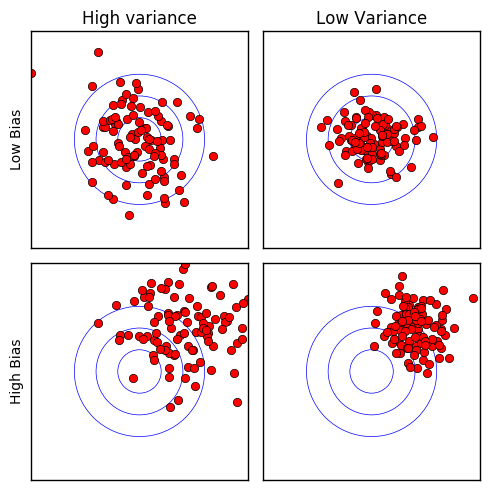

In [254]:
fig = plt.figure(figsize=(5,5))
# fig.set_size_inches(5,5)

ax = plt.subplot(2,2,1)
#High Variance
x1= np.random.normal(loc=2,scale=2,size=10000)[:,np.newaxis]
mean = [0, 0]
cov = [[.5, 0], [0, .5]]  # diagonal covariance
x, y = np.random.multivariate_normal(mean, cov, 100).T
ax.plot(x, y, 'or')

circle1 = plt.Circle((0, 0), 1.5, facecolor='none',edgecolor='b',linewidth=.5)
ax.add_artist(circle1)
circle2 = plt.Circle((0, 0), .5, facecolor='none',edgecolor='b',linewidth=.5)
ax.add_artist(circle2)

circle3 = plt.Circle((0, 0), 1, facecolor='none',edgecolor='b',linewidth=.5)
ax.add_artist(circle3)

ax.set_xlim([-2.5,2.5])
ax.set_ylim([-2.5,2.5])
# ax.set_axis_off()
plt.title('High variance')
plt.ylabel('Low Bias')
plt.xticks([])
plt.yticks([])

ax = plt.subplot(2,2,2)
#Low Variance
mean = [0, 0]
cov = [[.2, 0], [0, .2]]  # diagonal covariance
x, y = np.random.multivariate_normal(mean, cov, 100).T
ax.plot(x, y, 'or')

circle1 = plt.Circle((0, 0), 1.5, facecolor='none',edgecolor='b',linewidth=.5)
ax.add_artist(circle1)
circle2 = plt.Circle((0, 0), .5, facecolor='none',edgecolor='b',linewidth=.5)
ax.add_artist(circle2)
    
circle3 = plt.Circle((0, 0), 1, facecolor='none',edgecolor='b',linewidth=.5)
ax.add_artist(circle3)

ax.set_xlim([-2.5,2.5])
ax.set_ylim([-2.5,2.5])
# ax.set_axis_off()
plt.title('Low Variance')
plt.xticks([])
plt.yticks([])


ax = plt.subplot(2,2,3)
#Bias
x1= np.random.normal(loc=2,scale=2,size=10000)[:,np.newaxis]
mean = [1, 1]
cov = [[.5, 0], [0, .5]]  # diagonal covariance
x, y = np.random.multivariate_normal(mean, cov, 100).T
ax.plot(x, y, 'or')

circle1 = plt.Circle((0, 0), 1.5, facecolor='none',edgecolor='b',linewidth=.5)
ax.add_artist(circle1)
circle2 = plt.Circle((0, 0), .5, facecolor='none',edgecolor='b',linewidth=.5)
ax.add_artist(circle2)
    
circle3 = plt.Circle((0, 0), 1, facecolor='none',edgecolor='b',linewidth=.5)
ax.add_artist(circle3)

ax.set_xlim([-2.5,2.5])
ax.set_ylim([-2.5,2.5])

plt.ylabel('High Bias')
plt.xticks([])
plt.yticks([])

ax = plt.subplot(2,2,4)
#Bias
x1= np.random.normal(loc=2,scale=2,size=10000)[:,np.newaxis]
mean = [1, 1]
cov = [[.2, 0], [0, .2]]  # diagonal covariance
x, y = np.random.multivariate_normal(mean, cov, 100).T
ax.plot(x, y, 'or')

circle1 = plt.Circle((0, 0), 1.5, facecolor='none',edgecolor='b',linewidth=.5)
ax.add_artist(circle1)
circle2 = plt.Circle((0, 0), .5, facecolor='none',edgecolor='b',linewidth=.5)
ax.add_artist(circle2)
    
circle3 = plt.Circle((0, 0), 1, facecolor='none',edgecolor='b',linewidth=.5)
ax.add_artist(circle3)

ax.set_xlim([-2.5,2.5])
ax.set_ylim([-2.5,2.5])
plt.xticks([])
plt.yticks([])
plt.tight_layout()

# Tree Bagging example 

In [260]:
x1 = np.random.rand(N) * 10 - 5
x1 = np.sort(x1)
x1 = x1[:,np.newaxis]
print x1.shape
noise = 0.1 
def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

y = f(x1) + np.random.normal(0.0, noise, N)
y = y[:,np.newaxis]

def polynomial_regr(n_estimators=10):
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn import linear_model
    import random
    dlen = x1.shape[0]

    Y_ = np.zeros(y.shape)
    
    for i in range(n_estimators):
        
        
        X_tr = x1[:].astype(float)
        y_tr = y[:].astype(float)
        
        degree = np.random.randint(2,10)
        poly = PolynomialFeatures(degree=degree)
        X_tr_ = poly.fit_transform(X_tr)
        
        ind = random.sample(range(dlen),int(dlen/4))
        

        
        regr = DecisionTreeRegressor()
        regr.fit(X_tr[ind], y_tr[ind])
        y_pred_tr = regr.predict(X_tr)[:,np.newaxis]
        
    
        Y_ = np.add(Y_ , y_pred_tr)
        plt.plot(X_tr,y_pred_tr,'-b',markersize=.02,alpha=.1 );
    Y_ = Y_/float(n_estimators)
    print Y_.shape, y_pred_tr.shape
    plt.plot(X_tr,Y_,'-g',markersize=8,alpha=1 );
    plt.plot(X_tr,y_tr,'.r',markersize=2,alpha=1 );
    plt.xlim(x1.min(),x1.max())
    plt.ylim(y.min(),y.max())

(200, 1)


(200, 1) (200, 1)


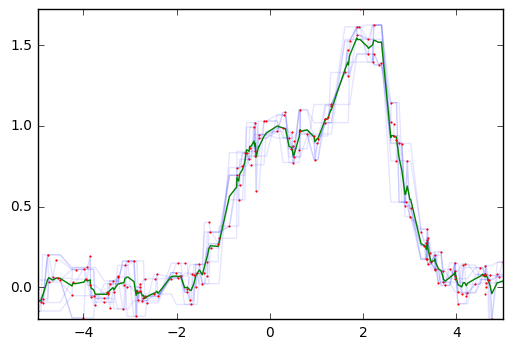

In [261]:
from ipywidgets import interact, HTML, FloatSlider
interact(polynomial_regr,n_estimators=(1,150,1));

# Random Forest Classifiers 

In [319]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

X = iris.data[:]
y = iris.target
X, y = make_blobs(n_samples=5000, n_features=5, centers=30,random_state=0)

clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2,random_state=0)
scores = cross_val_score(clf, X, y)
print 'DecisionTreeClassifier',  scores.mean()                             

clf = BaggingClassifier(DecisionTreeClassifier(max_depth=None), n_estimators=10)
scores = cross_val_score(clf, X, y)
print 'BaggingClassifier', scores.mean()

clf = RandomForestClassifier(n_estimators=80, max_depth=None,min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y)
print 'RandomForestClassifier', scores.mean()                             

clf = ExtraTreesClassifier(n_estimators=80, max_depth=None,min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y)
print 'ExtraTreesClassifier', scores.mean()


DecisionTreeClassifier 0.98197730081
BaggingClassifier 0.992800783714
RandomForestClassifier 0.995396911804
ExtraTreesClassifier 0.996993804599


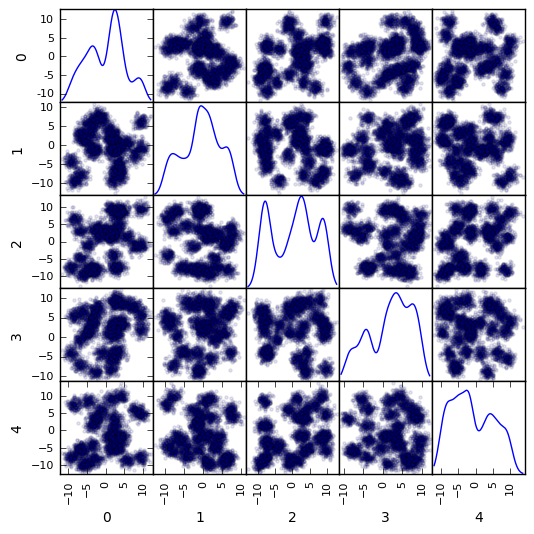

In [321]:
from pandas.tools.plotting import scatter_matrix
DF = pd.DataFrame(data=X)
pl = scatter_matrix(DF, alpha=0.1, figsize=(6, 6), diagonal='kde');

# Other Extensions (There are many)
* **Sckit-Learn Repo: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble**
* ** Stacking Models**
* ** Deep Random Forests and joint learning**

Automatically created module for IPython interactive environment


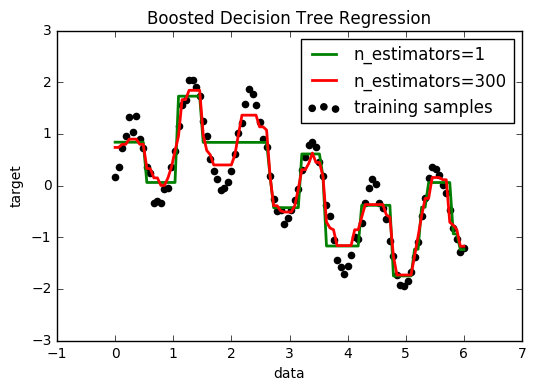

In [315]:
#Adaboost Example


print(__doc__)

# Author: Noel Dawe <noel.dawe@gmail.com>
#
# License: BSD 3 clause

# importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

# Create the dataset
rng = np.random.RandomState(1)
X = np.linspace(0, 6, 100)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=10, random_state=rng)

regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

# Plot the results
plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, y_1, c="g", label="n_estimators=1", linewidth=2)
plt.plot(X, y_2, c="r", label="n_estimators=300", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()